
<img src="https://th.bing.com/th/id/OIP.UALyJPEFAcMOe4IIyDoQbwAAAA?w=192&h=174&c=7&r=0&o=5&dpr=1.5&pid=1.7"  alt="Unable to display picture, please check the network" style="height:90px;" align="right"/>

<!-- <img src=" https://phys100.xmu.edu.cn/2020images/gold100.png"  alt="Unable to display picture, please check the network" style="height:85px;" align="right"/> -->
<hr>
<font face="微软雅黑" size=2><p align="right">院选课 《 <i>机器学习</i> 》 第 一 次作业——翟家辉 (<i>19720212203881</i>) </p></font> 
<hr>

# 

<font face="华文行楷" size=8 ><div align='center'>梯度下降与优化算法初探</div></font> 

    
 <font face="华文行楷" size=5 ><div align='center'>(A Preliminary Study on Gradient Descent and Optimization Algorithms)</div></font> 




---------------------
________________________
<font size=6><div align='center'> **---------------------------目录---------------------------**</div></font>

$\quad$

<font size=5> **&#x2705; 壹 · 梯度下降方法介绍**
    
$\quad$
    
<font size=5> **&#x2705; 贰 · 学习步长影响**

$\quad$
    
<font size=5> **&#x2705; 叁 · 其他优化方法举例**

$\quad$
    
<font size=5> **&#x2705; 肆 · 结语**

In [5]:
#常用库及命令

import numpy as np
    # 矩阵运算
import matplotlib.pyplot as plt
    # 绘图
import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
import math
    # 数学运算
import scipy as sc
    # 科学运算及其他
import sympy as sy
    # 符号计算
from scipy.optimize import curve_fit
    # 函数拟合
from scipy.fft import fft,fftfreq
    # 快速FFT变换
import numba as nb
    # CUDA加速
import time
    # 记录时间
from scipy.integrate import odeint
    # ODE求解
from scipy.integrate import solve_ivp
    # 变步长积分
import matplotlib.animation as animation
    # 动画
from joblib import Parallel, delayed
    # CPU并行加速
from tqdm import tqdm
    # 进度条显示
import taichi  
# %matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号
    


ImportError: Numba needs NumPy 1.21 or less

<h1>文档细目<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"></a></span></li><li><span><a href="#一-·-梯度下降方法介绍" data-toc-modified-id="一-·-梯度下降方法介绍-2">一 · 梯度下降方法介绍</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-2.0.1">损失函数</a></span></li><li><span><a href="#梯度下降（Gradient-Descent）" data-toc-modified-id="梯度下降（Gradient-Descent）-2.0.2">梯度下降（Gradient Descent）</a></span></li><li><span><a href="#Hessian矩阵" data-toc-modified-id="Hessian矩阵-2.0.3">Hessian矩阵</a></span></li><li><span><a href="#条件数" data-toc-modified-id="条件数-2.0.4">条件数</a></span></li><li><span><a href="#学习率" data-toc-modified-id="学习率-2.0.5">学习率</a></span></li><li><span><a href="#梯度法求$\sqrt[4]{9}-$" data-toc-modified-id="梯度法求$\sqrt[4]{9}-$-2.0.6">梯度法求$\sqrt[4]{9} $</a></span></li></ul></li></ul></li><li><span><a href="#二-·-学习步长影响" data-toc-modified-id="二-·-学习步长影响-3">二 · 学习步长影响</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#大范围粗遍历" data-toc-modified-id="大范围粗遍历-3.0.1">大范围粗遍历</a></span></li><li><span><a href="#临界区域遍历" data-toc-modified-id="临界区域遍历-3.0.2">临界区域遍历</a></span></li><li><span><a href="#学习步长干扰" data-toc-modified-id="学习步长干扰-3.0.3">学习步长干扰</a></span></li></ul></li></ul></li><li><span><a href="#三-·--改进GD学习步长" data-toc-modified-id="三-·--改进GD学习步长-4">三 ·  改进GD学习步长</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#随机起点迭代过程" data-toc-modified-id="随机起点迭代过程-4.0.1">随机起点迭代过程</a></span></li><li><span><a href="#远距离起点迭代过程" data-toc-modified-id="远距离起点迭代过程-4.0.2">远距离起点迭代过程</a></span></li></ul></li></ul></li><li><span><a href="#三-·-其他优化方法" data-toc-modified-id="三-·-其他优化方法-5">三 · 其他优化方法</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#BFGS" data-toc-modified-id="BFGS-5.0.1">BFGS</a></span></li><li><span><a href="#Nelder-Mead方法" data-toc-modified-id="Nelder-Mead方法-5.0.2">Nelder-Mead方法</a></span></li></ul></li></ul></li><li><span><a href="#四-·-结语" data-toc-modified-id="四-·-结语-6">四 · 结语</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#特别鸣谢🌹🌹🌹" data-toc-modified-id="特别鸣谢🌹🌹🌹-6.0.1">特别鸣谢🌹🌹🌹</a></span></li><li><span><a href="#引用" data-toc-modified-id="引用-6.0.2">引用</a></span></li></ul></li></ul></li></ul></div>

<span style="color: green;">结论</span>$\qquad$
<span style="color: blue;">引用</span>$\qquad$
<span style="color: red;">问题</span>$\qquad$
<span style="color: yellow;">再出发！</span>

---------
--------
# 一 · 梯度下降方法介绍

### 损失函数 

**[损失函数](https://zhuanlan.zhihu.com/p/261059231)**（loss function）就是用来度量模型的预测值 $f(x)$ 与真实值 $Y$ 的差异程度的运算函数，它是一个非负实值函数，通常使用 $L(Y,f(x))$ 来表示，不同种类的损失函数本质上就是以不同方法计算预测值和真实值的差距的类型函数，一般损失函数越小，模型的鲁棒性就越好。常见的损失函数见下表：

|<div style="width:150px" ><font size=4 >函数名称</font> </div> | <div style="width:300px" ><font size=4 >函数定义式</font> </div>|<div style="width:200px" ><font size=4 >优点</font> </div>|<div style="width:200px" ><font size=4 >缺点</font> </div>|
|:---------------------------:|:---------------------------:|:---------------------------|:---------------------------|
|<div style="width:150px" ><font size=2 >均方误差损失函数（MSE）</font> </div> | <div style="width:300px" >$\begin{aligned}L(Y|f(x))=\frac{1}{n}\sum_{i=1}^{N}(Y_i-f(x_i))^2\end{aligned}$ </div>|<div style="width:200px" >可解析；易优化；无参数；物理意义明确；对异常值敏感 </div>|<div style="width:200px" >图像和语音处理表现较弱；非平衡数据集不敏感；梯度消失；易过拟合 </div>|
|<div style="width:150px" ><font size=2 >L2损失函数</font> </div> | <div style="width:300px" >$\begin{aligned}L(Y|f(x))&=\sqrt{\frac{1}{n}\sum_{i=1}^N{(Y_i-f(x_i))^2}}\end{aligned}$ </div>|<div style="width:200px" >基本同上 </div>|<div style="width:200px" >基本同上 </div>|
|<div style="width:150px" ><font size=2 >L1损失函数</font> </div> | <div style="width:300px" >$L(Y|f(x))=\sum_{i=1}^N|Y_i-f(x_i)| $</div>|<div style="width:200px" >对离群点具有鲁棒性; 鼓励模型产生稀疏解</div>|<div style="width:200px" >在残差为零处不可导；更新的梯度始终相同；存在多个最小值</div>|
|<div style="width:150px" ><font size=2 >Smooth L1损失函数</font> </div> | <div style="width:300px" >$L(Y|f(x))=\begin{cases}\frac{1}{2}(Y-f(x))^2&\quad\text{|Y-f(x)|<1}\\|Y-f(x)|-\frac{1}{2}&\quad\text{|Y-f(x)|>=1}\end{cases}$ </div>|<div style="width:200px" >梯度稳定传播；平衡了对异常值的鲁棒性和对误差的平滑处理 </div>|<div style="width:200px" >-</div>|
|<div style="width:150px" ><font size=2 >KL散度函数（相对熵）</font> </div> | <div style="width:300px" >$L(Y|f(x))=\sum_{i=1}^nY_i\times log(\frac{Y_i}{f(x_i)})$ </div>|<div style="width:200px" >可以量化两个概率分布之间的差异程度；应用广泛 </div>|<div style="width:200px" >KL散度不对称；不具备度量性质</div>|
|<div style="width:150px" ><font size=2 >交叉熵损失</font> </div> | <div style="width:300px" >$L(Y|f(x))=-\sum_{i=1}^NY_ilogf(x_i)$ </div>|<div style="width:200px" >对概率偏离惩罚较高；梯度计算简单 </div>|<div style="width:200px" >忽略了类别之间的相关性</div>|


**通常情况下，损失函数的选取应从以下方面考虑：**
<div class="alert alert-block alert-info"><font>
<br> 
（1）考虑数据的特点和分布情况，选择最能表达数据的主要特征来构建基于距离或基于概率分布度量的特征空间。

（2）选择合理的特征归一化方法，使特征向量转换后仍能保持原来数据的核心内容。

（3）选取合理的损失函数，在实验的基础上，依据损失不断调整模型的参数，使其尽可能实现类别区分。

（4）合理组合不同的损失函数，发挥每个损失函数的优点，使它们能更好地度量样本间的相似性。

（5）将数据的主要特征嵌入损失函数，提升基于特定任务的模型预测精确度。
<br></font>
</div>

### 梯度下降（Gradient Descent）

**[梯度下降](https://zhuanlan.zhihu.com/p/140556531)** 是一种常用的优化算法，用于训练机器学习模型和神经网络。训练数据帮助这些模型逐渐学习如何去解决对应的任务或问题，而梯度下降算法中的损失函数充当了一个测量工具，用于在每次参数更新的迭代中评估模型的准确性是否得到提高。只有当函数接近或等于零时，模型才会继续调整其参数以产生最小的误差。

函数 $f(x)$ 的梯度是包含所有偏导数的向量，记为 $\bigtriangledown_{x}f(x)$ 。梯度的第 $i$ 个元素是 $f(x)$ 关于 $x_i$ 的偏导数，即 $$\bigtriangledown_xf(x)=(\frac\partial{\partial x_1}f(x),\frac\partial{\partial x_2}f(x),\ldots,\frac\partial{\partial x_n}f(x))^T$$。当梯度中所有元素为0时，所对应的驻点 $x$ 可能为局部极小点，局部极大点或者鞍点。梯度法认为负梯度方向就是目标函数值下降最快的方向，即 $\Delta x=-\nabla f(x)$ ，所以每次将变量沿着负梯度方向移动单位步长 $\alpha$ ，目标函数值就会逐渐收敛。梯度下降 $x$ 的迭代更新公式为：$$x_{n+1}=x_{n}-\alpha\bigtriangledown_xf(x)$$需要注意的是，梯度为0只是函数取极值的必要条件而不是充分条件，即梯度为0的点可能不是极值点。至于是极大值还是极小值，要看二阶导数/Hessian矩阵。


### Hessian矩阵

深度学习有时需要计算输入和输出都为向量的函数的所有偏导数，包含这样的偏导数的矩阵就是Jacobian矩阵。
$$J_{i,j}=\frac{\partial}{\partial x_j}f(x)_i$$
当函数具有多维输入时，需要对其进行计算二阶导数，包含这些导数的矩阵就是Hessian矩阵，$$H(f(x))_{i,j}=\frac{\partial^2}{\partial x_i\partial x_j}f(x)$$**[Hessian矩阵](https://zhuanlan.zhihu.com/p/433670585#:~:text=Hessian%E7%9A%84%E6%9D%A1%E4%BB%B6%E6%95%B0%E8%A1%A1%E9%87%8F%E4%BA%8C%E9%98%B6%E5%AF%BC%E6%95%B0%E7%9A%84%E5%8F%98%E5%8C%96%E8%8C%83%E5%9B%B4%EF%BC%8C%20%E6%9D%A1%E4%BB%B6%E6%95%B0%E5%BE%88%E5%B7%AE%E6%97%B6%EF%BC%8C%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95%E8%A1%A8%E7%8E%B0%E5%BE%88%E5%B7%AE%20%E3%80%82,%E5%9C%A8%E4%B8%80%E4%B8%AA%E6%96%B9%E5%90%91%E4%B8%8A%E5%AF%BC%E6%95%B0%E5%A2%9E%E5%8A%A0%E5%BE%88%E5%BF%AB%EF%BC%8C%E8%80%8C%E5%9C%A8%E5%8F%A6%E4%B8%80%E4%B8%AA%E6%96%B9%E5%90%91%E5%BE%88%E6%85%A2%EF%BC%8C%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E4%B8%8D%E7%9F%A5%E5%AF%BC%E6%95%B0%E7%9A%84%E8%BF%99%E7%A7%8D%E5%8F%98%E5%8C%96%EF%BC%8C%E6%89%80%E4%BB%A5%E5%AE%83%E4%B8%8D%E7%9F%A5%E9%81%93%E5%BA%94%E8%AF%A5%E4%BC%98%E5%85%88%E6%90%9C%E7%B4%A2%E5%80%92%E6%95%B0%E9%95%BF%E6%9C%9F%E4%B8%BA%E8%B4%9F%E7%9A%84%E6%96%B9%E5%90%91%E3%80%82%20%E7%97%85%E6%80%81%E6%9D%A1%E4%BB%B6%E4%B9%9F%E5%AF%BC%E8%87%B4%E5%BE%88%E9%9A%BE%E9%80%89%E6%8B%A9%E5%90%88%E9%80%82%E7%9A%84%E6%AD%A5%E9%95%BF%E3%80%82%20%E6%AD%A5%E9%95%BF%E5%A4%AA%E5%A4%A7%E4%BC%9A%E5%AF%BC%E8%87%B4%E5%86%B2%E8%BF%87%E6%9C%80%E5%B0%8F%E8%80%8C%E5%90%91%E5%85%B7%E6%9C%89%E8%BE%83%E5%BC%BA%E6%AD%A3%E6%9B%B2%E7%8E%87%E7%9A%84%E6%96%B9%E5%90%91%EF%BC%9B%E6%AD%A5%E9%95%BF%E5%A4%AA%E5%B0%8F%E4%BC%9A%E5%AF%BC%E8%87%B4%E5%9C%A8%E5%85%B6%E4%BB%96%E8%BE%83%E5%B0%8F%E6%9B%B2%E7%8E%87%E7%9A%84%E6%96%B9%E5%90%91%E4%B8%8A%E8%BF%9B%E5%B1%95%E4%B8%8D%E6%98%8E%E6%98%BE%E3%80%82%20%E4%BB%85%E7%94%A8%E6%A2%AF%E5%BA%A6%E4%BF%A1%E6%81%AF%E7%9A%84%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95%E7%A7%B0%E4%B8%BA%E4%B8%80%E9%98%B6%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95%EF%BC%8C%E5%A6%82%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%EF%BC%9B%E4%BD%BF%E7%94%A8Hessian%E7%9F%A9%E9%98%B5%E7%9A%84%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95%E7%A7%B0%E4%B8%BA%E4%BA%8C%E9%98%B6%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95%EF%BC%8C%E5%A6%82%E7%89%9B%E9%A1%BF%E6%B3%95%E3%80%82)** 等价于梯度的Jacobian矩阵，它是实对称矩阵，可以将其分解为一组实特征值和一组特征向量的正交基。
特定方向$d$上的二阶导数可以写成 $dHd$ 。$d$是$H$的特征向量时，这个方向的二阶导数就是对应的特征值，对于其他方向$d$，方向二阶导数是所有特征值的加权平均，权重在0和1之间，且与$d$夹角越小的特征向量的权重越大。最大特征值确定最大二阶导数，最小特征值对应最小二阶导数。

梯度法方法简单，但是收敛速度非常大程度地依赖于其Hessian矩阵的条件数（Condition Number）。最坏情况下该处的梯度方向与$H$的最大特征值 $\lambda_{max}$ 对应的特征向量对齐，最优步长是 $\frac{1}{\lambda_{max}}$ ，Hessian的特征值决定了学习率的量级,可以用该矩阵的条件数反映。

### 条件数

向量 $x$ 在经过矩阵 $A$ 变换前后模长比值的最大值，定义为 A 的范数。视向量是实体，矩阵是对实体的变换，范数体现在向量变换前后其长度的缩放程度。$$\|A\|=\max_x\frac{\|Ax\|}{\|x\|}$$
定义**[条件数](https://zhuanlan.zhihu.com/p/91393594)**为$$\kappa(A)=\left\|A\right\|\left\|A^{-1}\right\|$$
条件数同时描述了矩阵 $A$ 对向量的拉伸能力和压缩能力，换句话说，令向量发生形变的能力。条件数越大，向量在变换后越可能变化得越多。奇异值分解在几何上的表现就是将一组正交基转化为另一组正交基，奇异值$\sigma$描述了对应基向量的放缩倍数。这样的话，最大的奇异值就对应了向量经过 $A$ 变换后可能达到的最大放大倍数，最小的奇异值则对应了向量经过 $A$ 变换后可能达到的最小放大倍数。两者相乘即得到条件数的计算公式$$\kappa(A)=\kappa(A)=\left\|A\right\|\left\|A^{-1}\right\|_{max}/\sigma_{min}$$

Hessian的条件数衡量二阶导数的变化范围，**条件数很小时，梯度下降法表现很差**。在一个方向上导数增加很快，而在另一个方向很慢，梯度下降不知导数的这种变化，所以它不知道应该优先搜索倒数长期为负的方向。病态条件也导致很难选择合适的步长。步长太大会导致冲过最小而向具有较强正曲率的方向；步长太小会导致在其他较小曲率的方向上进展不明显。

仅用梯度信息的优化算法称为一阶优化算法，如梯度下降；使用Hessian矩阵的优化算法称为二阶优化算法，如牛顿法。牛顿法收敛很快，但初始点必须在极小点附近，在鞍点附近错误率高。梯度法收敛较慢但是一般不会被吸引到鞍点。

### 学习率

**学习率** （也称为步长或α值）是为了达到最小值而采取的步骤的大小。通常情况下，学习率是一个较小的值，并且它会根据损失函数的行为进行评估和更新。较高的学习率会导致较大的步长，但可能会过度超过最小值。相反，较低的学习率会产生较小的步长。虽然较低的学习率具有更高的精确性优势，但迭代次数会影响整体效率，需要更多的时间和计算才能达到最小值。

### 梯度法求$\sqrt[4]{9} $

$$f(x)=x^4-9$$

In [177]:
# 初始定义函数形式，误差函数，导数
x,y = symbols('x y')
F=x**4-9
L=F**2
L_Derivative = sy.diff(L, x)
Re=np.sqrt(np.sqrt(9))

In [178]:
print("损失函数一阶导")
L_Derivative

损失函数一阶导


8*x**3*(x**4 - 9)

In [86]:
L_DD=sy.diff(L_Derivative, x)
print("损失函数二阶导")
L_DD

损失函数二阶导


32*x**6 + 24*x**2*(x**4 - 9)

In [214]:
# 梯度下降(定次数)
@nb.jit(forceobj=True)
def GD_N(N,x_0,alpha,flag=True):
    global L_Derivative,L
    X=np.zeros(N)
    X[0]=x_0
    for i in range(N-1):
        X[i+1]=X[i]-alpha*L_Derivative.subs(x, X[i])
    if flag:
        return X
    else:
        return L.subs(x, X[-1])

# 梯度下降(定精度)
def GD_e(e,x_0,alpha,flag=True):
    global L_Derivative,L
    X=[x_0]
    i=0
    start_time = time.time()
    while L.subs(x, X[i])>=e:
        X.append(X[i]-alpha*L_Derivative.subs(x, X[i]))
        i+=1
        end_time = time.time()
        if (end_time-start_time)>=3:
            break
    if flag:
        return np.array(X)
    else:
        return L.subs(x, X[-1])

迭代过程 [1.         1.064      1.1383772  1.22477395 1.32398221 1.43403193
 1.54659035 1.64362041 1.70407712 1.72654252 1.73123398 1.73193822
 1.73203547 1.73204872 1.73205052 1.73205077 1.7320508  1.73205081
 1.73205081 1.73205081]
最终值 8.999999999725546


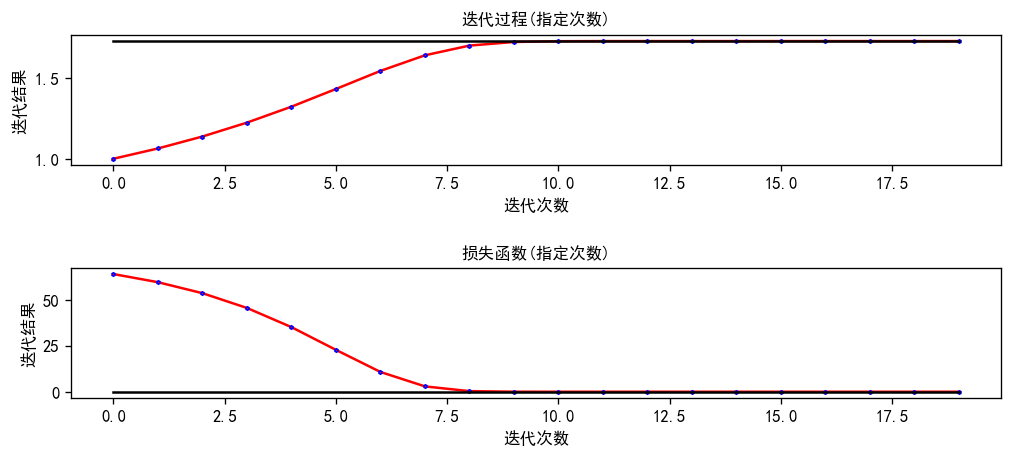

In [327]:
R=GD_N(20,1,0.001)
print("迭代过程",R)
print("最终值",R[-1]**4)
plt.figure(figsize=(10,4),dpi=120)
Ls=10


plt.subplot(2,1,1)
plt.title("迭代过程(指定次数)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
plt.plot(R,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R+Re,"-",c="black")


plt.subplot(2,1,2)
plt.title("损失函数(指定次数)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
LR=(R**4-9)**2
plt.plot(LR,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R,"-",c="black")
plt.subplots_adjust(hspace=0.8) 

最终值 9.23596047464706


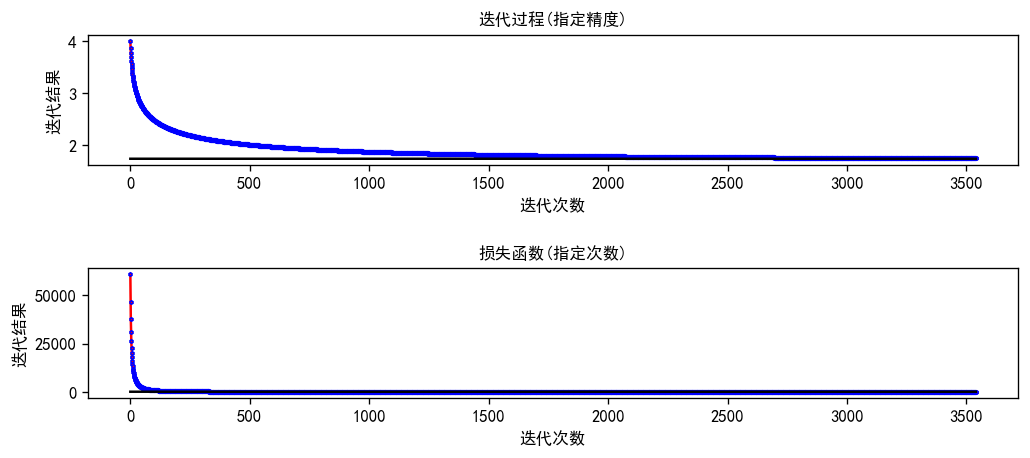

In [330]:
R=GD_e(0.001,4,0.000001)
# print("迭代过程",R)
print("最终值",R[-1]**4)
plt.figure(figsize=(10,4),dpi=120)
Ls=10

plt.subplot(2,1,1)
plt.title("迭代过程(指定精度)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
plt.plot(R,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R+Re,"-",c="black")

plt.subplot(2,1,2)
plt.title("损失函数(指定次数)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
LR=(R**4-9)**2
plt.plot(LR,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R,"-",c="black")
plt.subplots_adjust(hspace=0.8)

<div class="alert alert-success">

 随着迭代次数的增加，损失函数的值一般逐渐趋于零。但趋于零的过程受到初值和学习步长的影响。
<br>
</div>

---------
--------
# 二 · 学习步长影响 

考虑不同初值和学习步长下对结果的影响：

In [227]:
@nb.jit(forceobj=True)
def heat_GD(X_initial,a_initial,N):
    Heat=np.zeros((len(X_initial),len(a_initial)))
    for m in range(len(X_initial)):
        for n in range(len(a_initial)):
            Heat[m,n]=GD_N(N,X_initial[m],a_initial[n],False)
    return Heat

### 大范围粗遍历

In [340]:
X_initial=np.array([i for i in np.linspace(-10,10,45)])
a_initial=np.array([10**i for i in np.linspace(-8,-1,65)])
H=heat_GD(X_initial,a_initial,10)
print("损失函数终值")
print(np.nanmin(H),np.nanmax(H))

损失函数终值
8.594756793739871e-20 inf


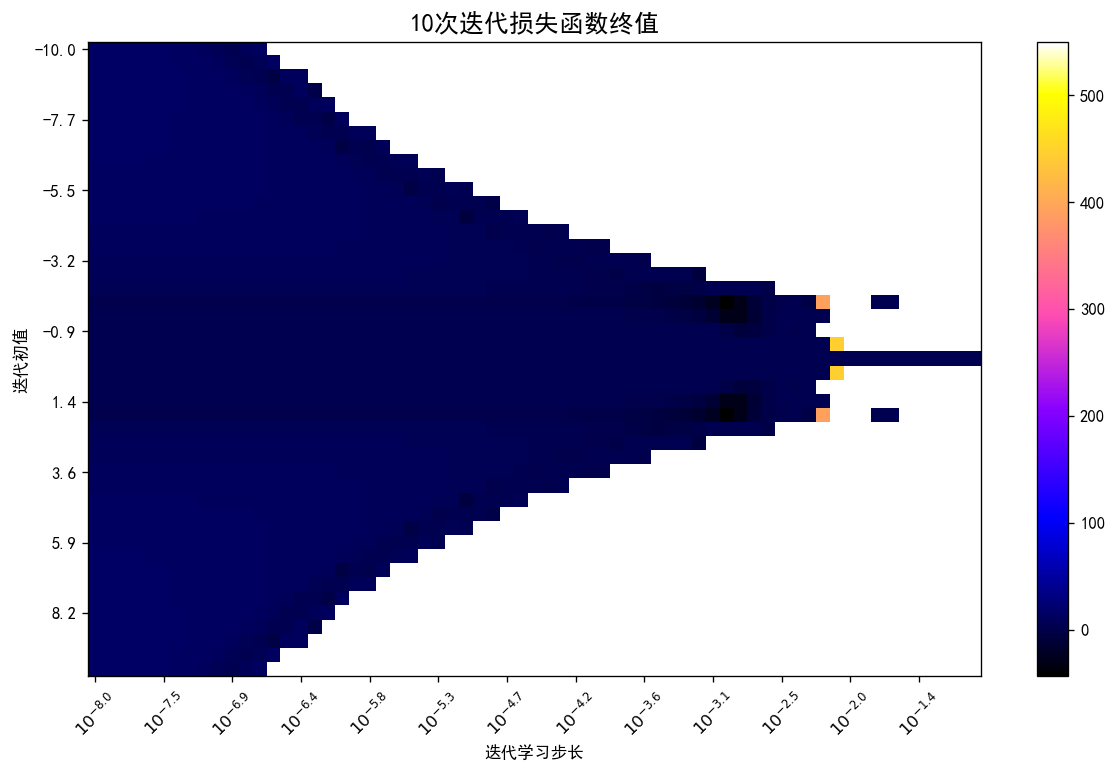

In [342]:
plt.figure(figsize=(12,7),dpi=120)
Ls=10
plt.title("10次迭代损失函数终值",size=Ls*1.5)
plt.ylabel("迭代初值",size=Ls)
plt.xlabel("迭代学习步长",size=Ls)
plt.imshow(np.log(H),aspect="auto",cmap='gnuplot2')
# plt.imshow(np.log(np.abs(H/Re)),aspect="auto",cmap='gnuplot2')

x_ticks = np.arange(len(a_initial))
x_labels = [f"$10^{{{np.log10(a):.1f}}}$" for i, a in enumerate(a_initial) if i % 5 == 0]
x_ticks_selected = x_ticks[::5]
plt.xticks(x_ticks_selected, x_labels, rotation=45)


y_ticks = np.arange(len(X_initial))
y_labels = [f"{x:.1f}" for i, x in enumerate(X_initial) if i % 5 == 0]
y_ticks_selected = y_ticks[::5]
plt.yticks(y_ticks_selected, y_labels)

plt.colorbar()

<div class="alert alert-success">
<br>
 在梯度下降的过程之中，较大的学习步长会导致损失函数飞速发散，较小的学习步长难以使的损失函数收敛为0。
<br>
</div>

### 临界区域遍历

In [331]:
X_initial=np.array([i for i in np.linspace(1,2,45)])
a_initial=np.array([10**i for i in np.linspace(-6,-2.2,65)])
H=heat_GD(X_initial,a_initial,20)
print("损失函数终值")
print(np.nanmin(H),np.nanmax(H))

3.1554436208840472e-30 inf


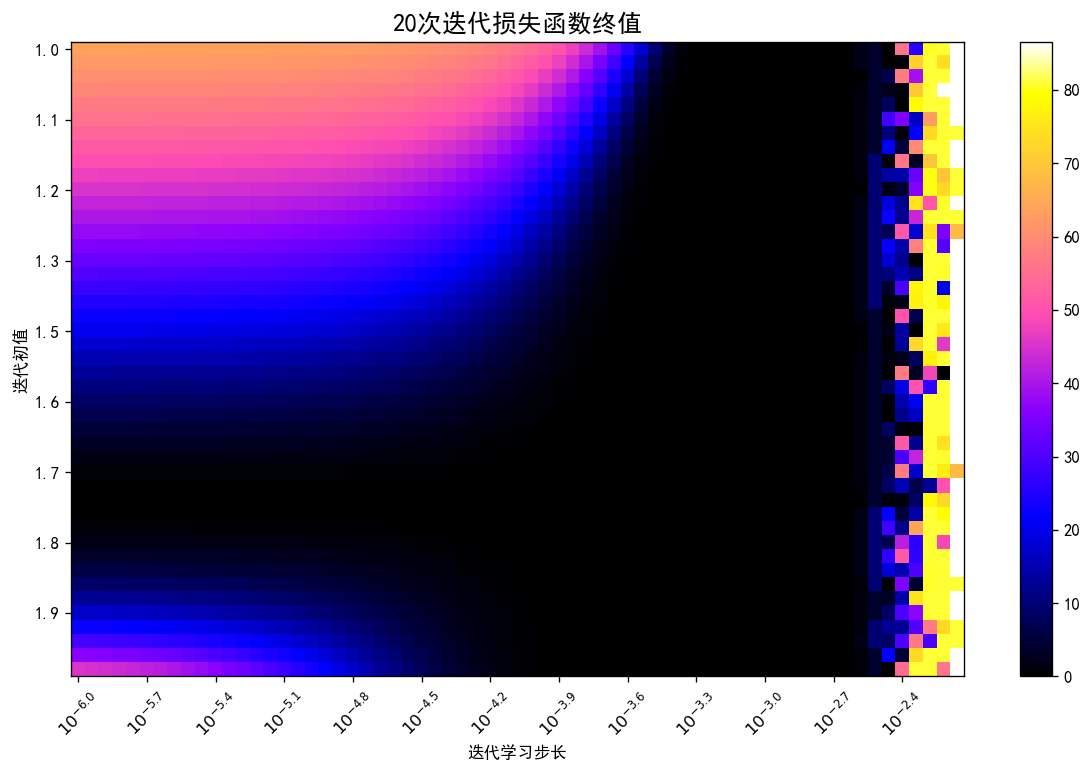

In [332]:
plt.figure(figsize=(12,7),dpi=120)
Ls=10
plt.title("20次迭代损失函数终值",size=Ls*1.5)
plt.ylabel("迭代初值",size=Ls)
plt.xlabel("迭代学习步长",size=Ls)
plt.imshow(H,aspect="auto",cmap='gnuplot2')
# plt.imshow(np.log(np.abs(H/Re)),aspect="auto",cmap='gnuplot2')

x_ticks = np.arange(len(a_initial))
x_labels = [f"$10^{{{np.log10(a):.1f}}}$" for i, a in enumerate(a_initial) if i % 5 == 0]
x_ticks_selected = x_ticks[::5]
plt.xticks(x_ticks_selected, x_labels, rotation=45)


y_ticks = np.arange(len(X_initial))
y_labels = [f"{x:.1f}" for i, x in enumerate(X_initial) if i % 5 == 0]
y_ticks_selected = y_ticks[::5]
plt.yticks(y_ticks_selected, y_labels)

plt.colorbar()

<div class="alert alert-success">
<br>
 在预期最小值点附近进行梯度下降的过程之中，存在一学习步长界限使的损失函数值反复跳跃，无法稳定收敛。
<br>
</div>

### 学习步长干扰

In [344]:
X_initial=np.array([i for i in np.linspace(0.7,2,80)])
a_initial=np.array([10**i for i in np.linspace(-2.75,-2.26,100)])
H=heat_GD(X_initial,a_initial,5)
print("损失函数终值")
print(np.nanmin(H),np.nanmax(H))

损失函数终值
3.492416573066833e-08 97.83432871918941


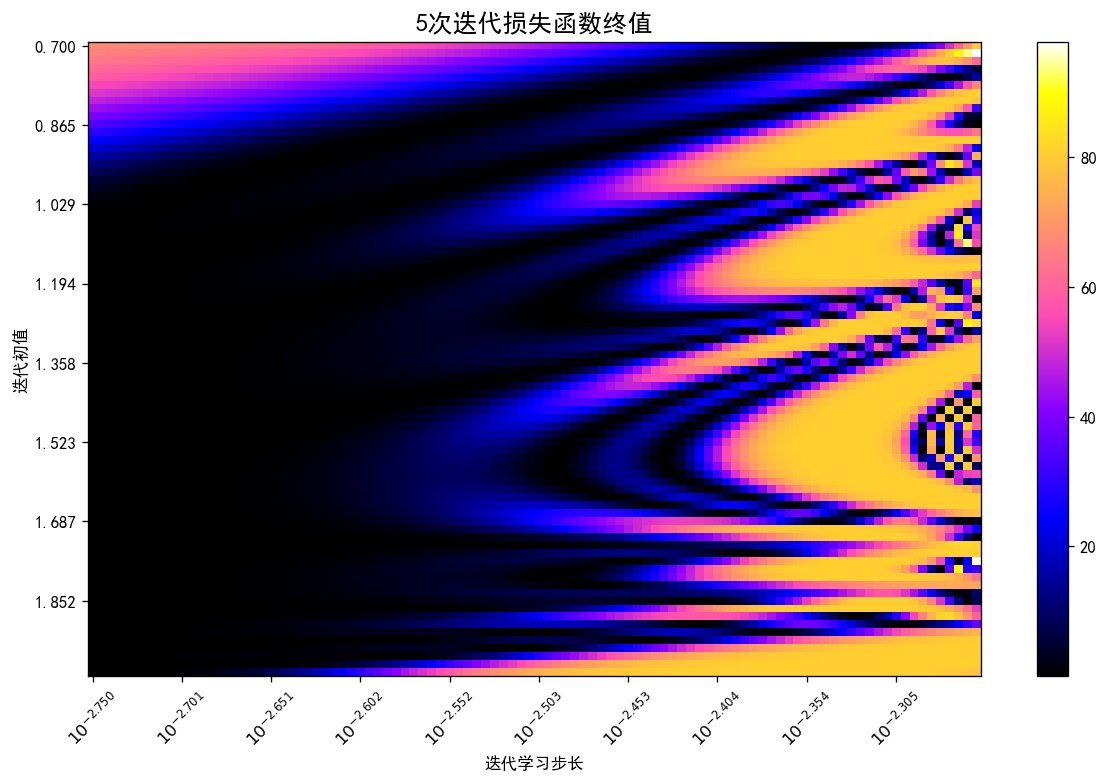

In [346]:
plt.figure(figsize=(12,7),dpi=120)
Ls=10
plt.title("5次迭代损失函数终值",size=Ls*1.5)
plt.ylabel("迭代初值",size=Ls)
plt.xlabel("迭代学习步长",size=Ls)
plt.imshow(H,aspect="auto",cmap='gnuplot2')
# plt.imshow(np.log(np.abs(H/Re)),aspect="auto",cmap='gnuplot2')

x_ticks = np.arange(len(a_initial))
x_labels = [f"$10^{{{np.log10(a):.3f}}}$" for i, a in enumerate(a_initial) if i % 10 == 0]
x_ticks_selected = x_ticks[::10]
plt.xticks(x_ticks_selected, x_labels, rotation=45)


y_ticks = np.arange(len(X_initial))
y_labels = [f"{x:.3f}" for i, x in enumerate(X_initial) if i % 10 == 0]
y_ticks_selected = y_ticks[::10]
plt.yticks(y_ticks_selected, y_labels)

plt.colorbar()

<div class="alert alert-success">
<br>
学习步长界限附近的损失函数值反复跳跃，在短期内呈现一定的火焰形层状分形结构。
<br>
</div>

---------
--------
# 三 ·  改进GD学习步长

利用Hession矩阵特征值倒数作为学习步长，在一维情况下取二阶导。

In [80]:
print("Hession矩阵")
hessian_matrix = sy.hessian(L,(x,y))
hessian_matrix

Hession矩阵


Matrix([
[32*x**6 + 24*x**2*(x**4 - 9), 0],
[                           0, 0]])

In [4]:
@nb.jit(forceobj=True)
def GD_H(N,x_0,flag=True):
    global L_Derivative,L,L_DD
    X=np.zeros(N)
    X[0]=x_0
    for i in range(N-1):
        X[i+1]=X[i]-1/L_DD.subs(x, X[i])*L_Derivative.subs(x, X[i])
    if flag:
        return X
    else:
        return L.subs(x, X[-1])

NameError: name 'nb' is not defined

### 随机起点迭代过程

In [1]:
r=np.random.uniform(-10,10)
print("随机起点",r)
R=GD_H(30,r)
print("迭代过程",R)
print("最终值",R[-1]**4)
plt.figure(figsize=(10,4),dpi=120)
Ls=10


plt.subplot(2,1,1)
plt.title("迭代过程(指定次数)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
plt.plot(R,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R+Re,"-",c="black")


plt.subplot(2,1,2)
plt.title("损失函数(指定次数)",size=Ls)
plt.xlabel("迭代次数",size=Ls)
plt.ylabel("迭代结果",size=Ls)
LR=(R**4-9)**2
plt.plot(LR,"-h",markersize=2,c="r",markeredgecolor="b")
plt.plot(R-R,"-",c="black")
plt.subplots_adjust(hspace=0.8) 

随机起点 -7.801047819329751


NameError: name 'GD_H' is not defined

### 远距离起点迭代过程

In [368]:
@nb.jit(forceobj=True)
def heat_GDH(N_initial,X_initial):
    Heat=np.zeros((len(N_initial),len(X_initial)))
    for m in tqdm(range(len(N_initial))):
        for n in range(len(X_initial)):
            Heat[m,n]=GD_H(N_initial[m],X_initial[n],False)
    return Heat

In [403]:
N_initial=np.array([int(10**i) for i in np.linspace(1,1.5,15)])
X_initial=np.array([i for i in np.linspace(-8,10,15)])
H=heat_GDH(N_initial,X_initial)
print("损失函数终值")
print(np.nanmin(H),np.nanmax(H))

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.20it/s]

损失函数终值
3.1554436208840472e-30 1162.1838564859409


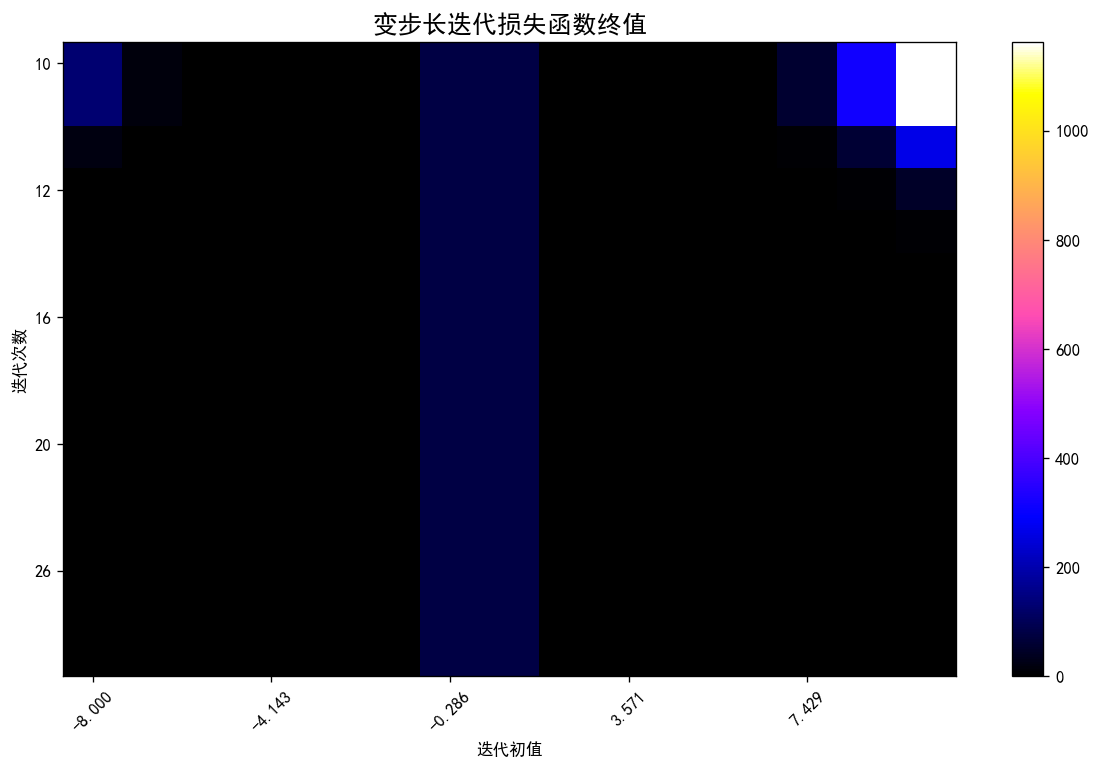

In [404]:
plt.figure(figsize=(12,7),dpi=120)
Ls=10
plt.title("变步长迭代损失函数终值",size=Ls*1.5)
plt.ylabel("迭代次数",size=Ls)
plt.xlabel("迭代初值",size=Ls)
plt.imshow(H,aspect="auto",cmap='gnuplot2')
# plt.imshow(np.log(np.abs(H/Re)),aspect="auto",cmap='gnuplot2')

x_ticks = np.arange(len(X_initial))
x_labels = [f"{a:.3f}" for i, a in enumerate(X_initial) if i % 3 == 0]
x_ticks_selected = x_ticks[::3]
plt.xticks(x_ticks_selected, x_labels, rotation=45)


y_ticks = np.arange(len(N_initial))
y_labels = [f"{x:.0f}" for i, x in enumerate(N_initial) if i %3 == 0]
y_ticks_selected = y_ticks[::3]
plt.yticks(y_ticks_selected, y_labels)

plt.colorbar()

<div class="alert alert-success">
<br>
通过改变学习步长为损失函数二阶导的倒数，对远离预期最小值点的初值取到了不错的收敛效果,但在靠近预期最小值点的初值收敛缓慢。
<br>
</div>

---------
--------
# 三 · 其他优化方法

In [450]:
def f(x):
    return (x**4-9)**2
ran=np.random.uniform(2,100)
a = np.linspace(-ran, ran, 100)
b = f(a)
x0=np.random.uniform(-ran,ran)

### BFGS

BFGS作为一种的拟牛顿方法, 其不直接计算Hessian阵, 而是用梯度信息近似计算Hessian阵的逆并迭代更新, 因此是一阶方法, 其更新公式如下:$$H_{k+1}=(I-\rho_ks_ky_k^T)H_k(I-\rho_ky_ks_k^T)+\rho_ks_ks_k^T$$,由于$H_{k+1}$直接为Hessian阵的逆的近似, 因此搜索方向为$$p_{k+1}=-H_{k+1}\nabla f_{k+1}$$

      fun: 2.4347792677274964e-14
 hess_inv: array([[0.0011572]])
      jac: array([-4.90675958e-08])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 37
     njev: 38
   status: 0
  success: True
        x: array([-1.73205082])


D:\AnacONDa\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


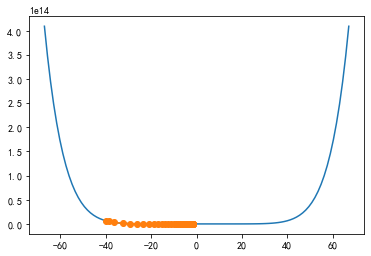

In [451]:
plt.plot(a, b)

xi = [x0]
res = sc.optimize.minimize(f, x0=xi[0], method="BFGS", callback=xi.append)
print(res)

plt.plot(xi, [f(xi[i]) for i in range(len(xi))], 'o-')
plt.show()

### Nelder-Mead方法

$\bar{x}=\frac1n\sum_{i=1}^nx_i$,Nelder-Mead方法出于尽量远离函数值最高的点的想法, 去观察$\bar{x}(-1)$的值,具体见下图：

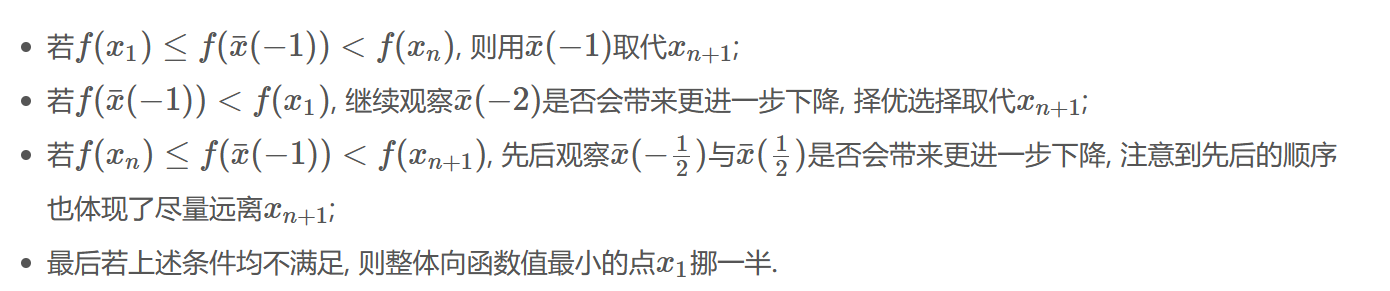

 final_simplex: (array([[-1.73203574],
       [-1.7320965 ]]), array([9.80724211e-08, 9.02108023e-07]))
           fun: 9.807242105575806e-08
       message: 'Optimization terminated successfully.'
          nfev: 46
           nit: 23
        status: 0
       success: True
             x: array([-1.73203574])


D:\AnacONDa\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


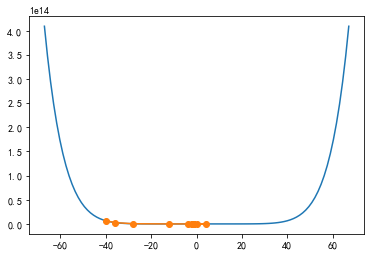

In [455]:
plt.plot(a, b)

xi = [x0]
res = sc.optimize.minimize(f, x0=xi[0], method="Nelder-Mead", callback=xi.append)
print(res)

plt.plot(xi, [f(xi[i]) for i in range(len(xi))], 'o-')
plt.show()

---------
--------
# 四 · 结语  

### 特别鸣谢&#x1F339;&#x1F339;&#x1F339;
21世纪互联网的深邃与丰厚

### 引用

https://zhuanlan.zhihu.com/p/140556531

https://zhuanlan.zhihu.com/p/91393594

https://zhuanlan.zhihu.com/p/261059231

https://msgsxj.cn/2019/02/20/SciPy%E4%B8%AD%E7%9A%84%E7%BB%8F%E5%85%B8%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95/

https://blog.csdn.net/xu624735206/article/details/117320847